In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from pybaselines.polynomial import imodpoly
%matplotlib widget

In [16]:
kgy0 = pd.read_csv('../mdi_optimization/cleaned_csvs/48_scans.csv').drop(columns=['wave_no'])
kgy2_5 = pd.read_csv('../irradiated_analysis/2.5kgy/2.5kgy_sn48.csv')
kgy5 = pd.read_csv('../irradiated_analysis/5kgy/5kgy_sn48.csv')
kgy10 = pd.read_csv('../irradiated_analysis/10kgy/10kgy_sn48.csv')
kgy25 = pd.read_csv('../irradiated_analysis/25kgy/25kgy_sn48.csv')
kgy50 = pd.read_csv('../irradiated_analysis/50kgy/50kgy_sn48.csv')
wavenumber = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')

In [29]:
def trans(abs):
    trans = ((10**(-abs))*100)
    return trans

In [ ]:
doses = [kgy0, kgy2_5, kgy5, kgy10, kgy25, kgy50]
colors = ["black", "green", "blue", "violet", "brown", "red"]
labels = ["0 kGy", "2.5 kGy", "5 kGy", "10 kGy", "25 kGy", "50 kGy"]

for df in doses:
    df['average'] = df.mean(axis=1)

In [68]:
baselined_2_5 = pd.DataFrame()
for sample in kgy2_5:
    raw = kgy2_5[sample]
    bs = imodpoly(raw)[0]
    bs_corrected = raw-bs
    
    baselined_2_5[sample] = pd.Series(bs_corrected)

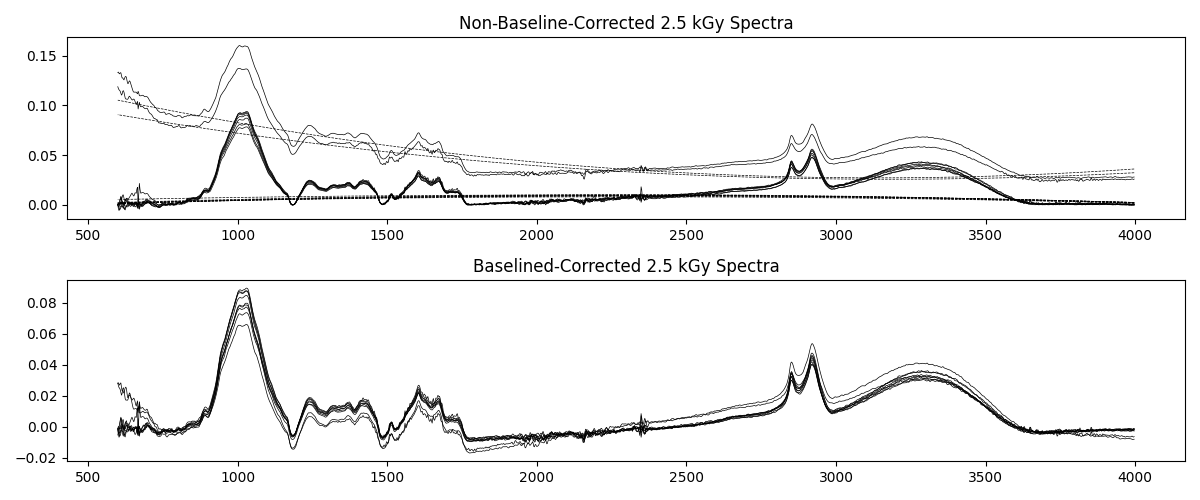

In [67]:
plt.close('all')

baseline_2_5, (raw, baselined) = plt.subplots(2,1, figsize=(12,5))

for sample in kgy2_5.columns:
    spectrum_raw = kgy2_5[sample]
    baseline = imodpoly(spectrum_raw)[0]
    spectrum_baselined = spectrum_raw-baseline

    raw.plot(wavenumber, spectrum_raw, linewidth=0.5, color='black')
    raw.plot(wavenumber, baseline, linewidth=0.5, color='black', linestyle='--')
    baselined.plot(wavenumber, spectrum_baselined, linewidth=0.5, color='black')


raw.set(title='Non-Baseline-Corrected 2.5 kGy Spectra')
baselined.set(title='Baselined-Corrected 2.5 kGy Spectra')
baseline_2_5.tight_layout()